# Climate Change Sonification
## Exploratory Data Analysis

In [20]:
import os, sys
import numpy as np
from netCDF4 import Dataset

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib import animation 
from IPython.display import HTML
from matplotlib import rcParams
rcParams["font.family"] = "Times New Roman"
%matplotlib inline

In [21]:
FREQ = "daily" 
# FREQ = "monthly" 
PATH = "data/" + FREQ + "/"
files = sorted([ f for f in os.listdir(path=PATH) if f.endswith(".nc4") ])
# files = files[::80]

co2_data = []
for f in files:
    try:
        co2_data.append(Dataset(PATH + f).variables["XCO2"][:])#
    except:
        pass

In [22]:
len(files)

626

In [16]:
vmin = min([ d.min() for d in co2_data ])
vmax = max([ d.max() for d in co2_data ])

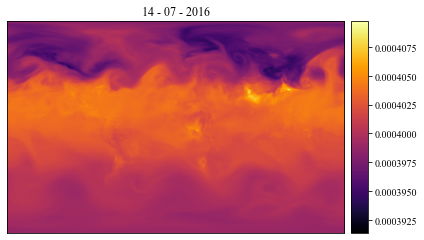

In [11]:
# %matplotlib notebook

# set up plotting area
fig, ax = plt.subplots()
ax.tick_params(
    left=False,
    bottom=False,
    labelleft=False,
    labelbottom=False
)

# colorbar
ax_divider = make_axes_locatable(ax)
cax = ax_divider.append_axes("right", size="5%", pad="2%")
cmap = mpl.cm.inferno
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cb = mpl.colorbar.ColorbarBase(
    cax, 
    cmap=cmap,
    norm=norm,
    orientation="vertical"
)

def plot_img(data):
    """Plot CO2 values"""
    data = np.flip(data, axis=0)
    ax.imshow(
        data,
        cmap=cmap, 
        vmin=vmin, 
        vmax=vmax,
        animated=True
    )

# for blitting (optimized raster image animation)
im = plot_img(co2_data[0][0,:,:])

def update(i):  
    im = plot_img(co2_data[i][0,:,:])
    
    # axis title
    if FREQ == "daily":
        date = files[i].split("_")[4]
        ax.set_title(date[-2:] + " - " + date[-4:-2] + " - " + date[:-4])
    elif FREQ == "monthly":
        date = files[i].split("_")[4]
        ax.set_title(date[-2:] + " - " + date[:-2])

# animate
ani = animation.FuncAnimation(
    fig, 
    update, 
    frames=len(files), 
    interval=500, 
    repeat=True, 
    repeat_delay=1000,
    # blit=True
)

# save and display
plt.tight_layout()
ani.save('img/animation.gif', writer='imagemagick')
HTML(ani.to_html5_video())

In [23]:
# Global statistics
means = np.array([ d.mean() for d in co2_data ])
stds = np.array([ d.std() for d in co2_data ])
mins = np.array([ d.min() for d in co2_data ])
maxs = np.array([ d.max() for d in co2_data ])

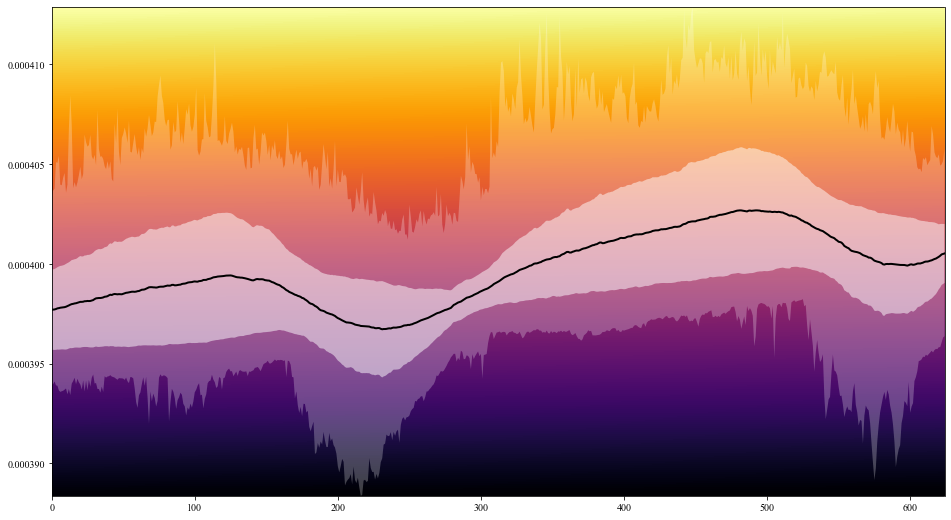

In [25]:
_, ax = plt.subplots(figsize=(16,9))

x = np.arange(len(co2_data))

k = 100
X = np.arange(k * k).reshape(k,k)

xmin = x.min()
xmax = x.max()
ymin = mins.min()
ymax = maxs.max()

ax.imshow(X, interpolation='bicubic', cmap=mpl.cm.inferno_r,
          extent=(xmin, xmax, ymin, ymax), alpha=1, aspect='auto')

ax.plot(means, lw=2, c="black")

# standard deviations
ax.fill_between(x, means, means + stds, facecolor="white", alpha=.5)
ax.fill_between(x, means, means - stds, facecolor="white", alpha=.5)

# extrema
ax.fill_between(x, means, mins, facecolor="white", alpha=.25)
ax.fill_between(x, means, maxs, facecolor="white", alpha=.25)
    
ax.set_ylim(ymin, ymax)
plt.show()